In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import constants

In [5]:
r_earth = 6.371*10**6 #meters
r_planet9 = 2.94 * r_earth
AU = 1.496*10**11 #meters
distance = 500.0*AU
angular_size = 2*np.arctan(r_planet9/distance) #radians
angular_size_arcsec =  ((angular_size*360)/(2*np.pi))*3600

In [6]:
solid_angle_radians = np.pi*(angular_size/2)**2

In [19]:
solid_angle_arcsec = np.pi*(angular_size_arcsec/2)**2

In [7]:
#Replicating calculations in ACT paper (page 3)

T = 42.4 #K
f = 98*10**9 #act freq Hz
h=constants.h
c=constants.speed_of_light
k=constants.k
wavelength = c/f
I_v = (2*h*f**3/c**2)*(1/(np.exp(h*f/(k*T))-1))

In [8]:
S = I_v*solid_angle_radians*10**(26) #Janskys # spectral flux density brightness

In [9]:
S

0.002330432560058663

In [10]:
####Calculations for angular size and antenna temperature 

In [11]:
radius_arr = np.arange(2.71,5.1,0.01)*r_earth
distance_arr = np.arange(400,800,0.1)*AU
r,d = np.meshgrid(radius_arr,distance_arr)
ang_rad_arr = (2*np.arctan(r/d)) #radians

In [44]:
ang_arcsec_arr=((ang_rad_arr*360)/(2*np.pi))*3600 #arcsec
solid_ang_arr = np.pi*(ang_arcsec_arr/2)**2 #solid angle in arcsec^2

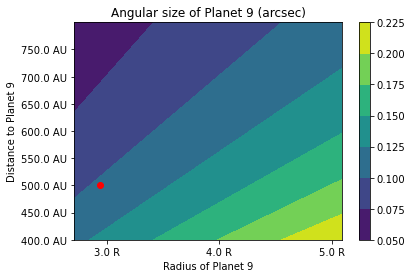

In [45]:
fig,ax=plt.subplots()
ax1=ax.contourf(r,d,ang_arcsec_arr)
ax.set_xlabel("Radius of Planet 9")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0*r_earth))
ax.xaxis.set_major_formatter(plt.FuncFormatter(
   lambda val,pos: '{:0.1f} R'.format(val/r_earth) if val !=0 else '0'
))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50.0*AU))
ax.yaxis.set_major_formatter(plt.FuncFormatter(
   lambda val,pos: '{:0.1f} AU'.format(val/AU) if val !=0 else '0'
))
ax.set_ylabel("Distance to Planet 9")
ax.scatter(2.94*r_earth,500*AU,c="r")
ax.set_title("Angular size of Planet 9 (arcsec)")
fig.colorbar(ax1)

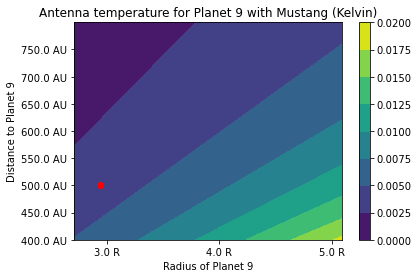

In [46]:
mustang_fwhm_beam = 9 #arcsec
mustang_solid_angle = np.pi*9**2/(4*np.log(2)) #arcsec^2
T_antenna = 42.2*(solid_ang_arr/mustang_solid_angle)
fig,ax=plt.subplots()
ax1=ax.contourf(r,d,T_antenna)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0*r_earth))
ax.xaxis.set_major_formatter(plt.FuncFormatter(
   lambda val,pos: '{:0.1f} R'.format(val/r_earth) if val !=0 else '0'
))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50.0*AU))
ax.yaxis.set_major_formatter(plt.FuncFormatter(
   lambda val,pos: '{:0.1f} AU'.format(val/AU) if val !=0 else '0'
))
ax.set_xlabel("Radius of Planet 9")
ax.set_ylabel("Distance to Planet 9")
ax.scatter(2.94*r_earth,500*AU,c="r")
ax.set_title("Antenna temperature for Planet 9 with Mustang (Kelvin)")
fig.colorbar(ax1)

In [20]:
42.2*(solid_angle_arcsec/mustang_solid_angle)

0.003853628330254827

In [47]:
T_antenna[1000,23]

0.003853628330254463

In [40]:
solid_angle_arcsec

0.008381211771815803

In [41]:
100/0.1

1000.0